## External Compton


![EC scheme](jetset_EC_scheme.png)


### Broad Line Region


In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'],disk_type='BB')


The `show_model` method provides, among other information, information concerning the accretion disk, in this case we use a mono temperature black body `BB` 

In [2]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 1.000000e+45 (erg/s)
 T disk: 1.000000e+05 (K)
 nu peak disk: 8.171810e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower

### change Disk type

the disk type can be set as a more realistic multi temperature black body (MultiBB).  In this case the `show_model` method provides physical parameters regarding the  multi temperature black body accretion disk: 

- the Schwarzschild (Sw radius)

- the Eddington luminosity (L Edd.)

- the accretion rate (accr_rate)

- the Eddington accretion rate (accr_rate Edd.)

In [3]:
my_jet.add_EC_component(['EC_BLR','EC_Disk'],disk_type='MultiBB')
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=5E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=3E15)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization  True
 log-values  False

accretion disk:
 disk Type: MultiBB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)
 Sw radius 2.953539e+14 (cm)
 L Edd. 1.666723e+47 (erg/s)
 accr_rate: 2.205171e+00 (M_sun/yr)
 accr_rate Edd.: 3.675409e+01 (M_sun/yr)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
ext

now we set some parameter for the model

In [4]:
my_jet.eval()


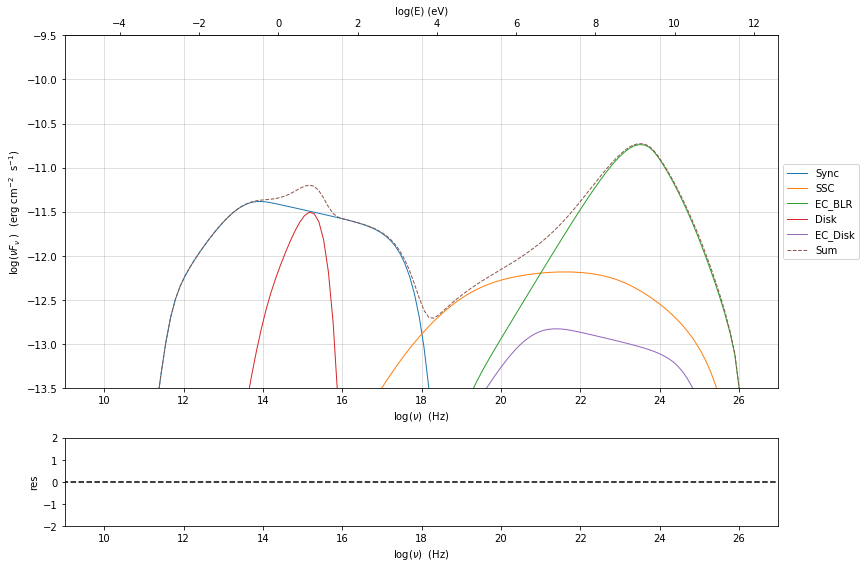

In [5]:
p=my_jet.plot_model(frame='obs')
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

### Dusty Torus

In [6]:
my_jet.add_EC_component('DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.0000

In [7]:
my_jet.eval()


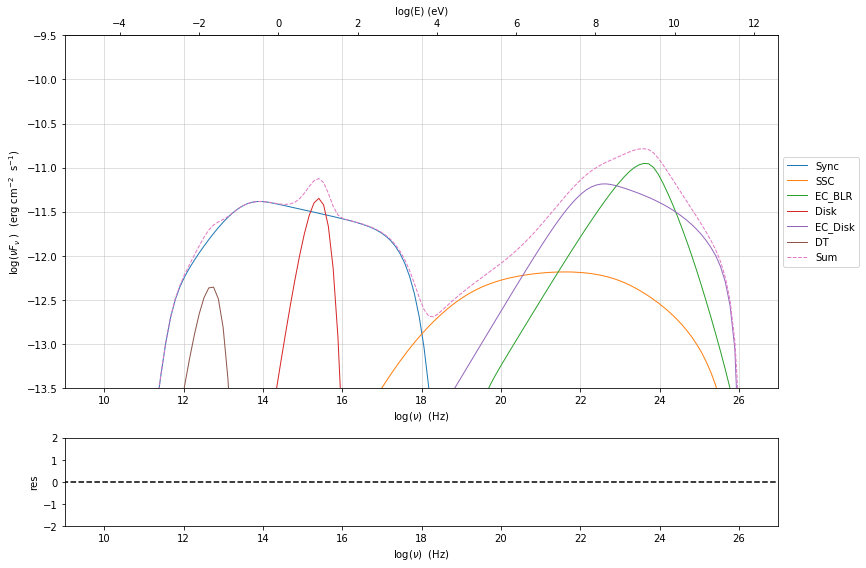

In [8]:
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

In [9]:
my_jet.add_EC_component('EC_DT')
my_jet.eval()


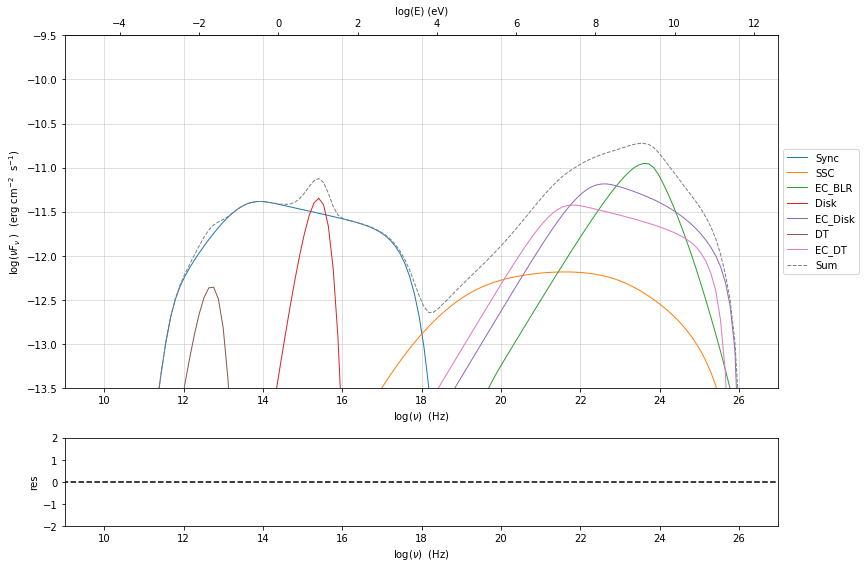

In [10]:
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

### Changing the external field transformation

Default method, is the transformation of the external photon field from the disk/BH frame to the relativistic blob

In [11]:
my_jet.set_external_field_transf('blob')

Alternatively, in the case of istropric fields as the CMB or the BLR and DT within the BLR radius, and DT radius, respectively, the it is possible to transform the the electron distribution, moving the blob to the disk/BH frame.

In [12]:
my_jet.set_external_field_transf('disk')

### External photon field energy density along the jet

In [13]:
def iso_field_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/(4*np.pi*R*R*3E10)*BulckFactor*BulckFactor*(1+((beta**2)/3))

def external_iso_behind_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/((4*np.pi*R*R*3E10)*(BulckFactor*BulckFactor*(1+beta)**2))


EC seed photon fields, in the Disk  rest frame

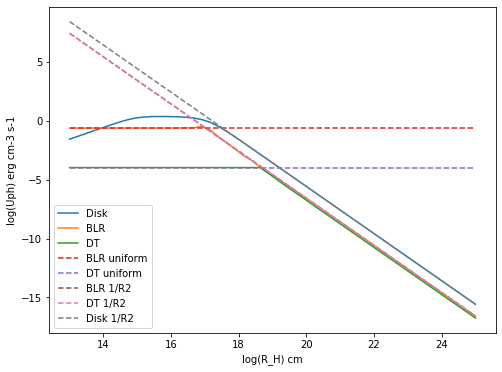

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)
N=50
G=1
R_range=np.logspace(13,25,N)
y=np.zeros((8,N))
my_jet.set_verbosity(0)
my_jet.set_par('R_BLR_in',1E17)
my_jet.set_par('R_BLR_out',1.1E17)
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR_DRF']
    y[0,ID]=my_jet.energetic_dict['U_Disk_DRF']
    y[2,ID]=my_jet.energetic_dict['U_DT_DRF']
    
y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph) erg cm-3 s-1')

ax.legend()


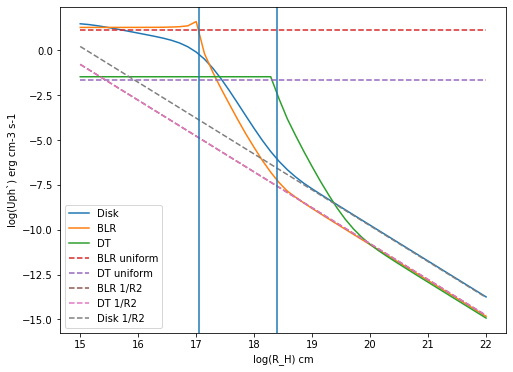

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)

L_Disk=1E45
N=50
G=my_jet.parameters.BulkFactor.val
R_range=np.logspace(15,22,N)
y=np.zeros((8,N))
my_jet.set_par('L_Disk',val=L_Disk)
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_par('R_BLR_in',1E17*(L_Disk/1E45)**.5)
    my_jet.set_par('R_BLR_out',1.1E17*(L_Disk/1E45)**.5)
    my_jet.set_par('R_DT',2.5E18*(L_Disk/1E45)**.5)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR']
    y[0,ID]=my_jet.energetic_dict['U_Disk']
    y[2,ID]=my_jet.energetic_dict['U_DT']
    


y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),'-',label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.axvline(np.log10( my_jet.parameters.R_DT.val ))
ax.axvline(np.log10( my_jet.parameters.R_BLR_out.val))

ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph`) erg cm-3 s-1')

ax.legend()


### IC against the CMB

In [16]:
my_jet=Jet(name='test_equipartition',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.set_par('R',val=1E21)
my_jet.set_par('z_cosm',val= 0.651)
my_jet.set_par('B',val=2E-5)
my_jet.set_par('gmin',val=50)
my_jet.set_par('gamma0_log_parab',val=35.0E3)
my_jet.set_par('gmax',val=30E5)
my_jet.set_par('theta',val=12.0)
my_jet.set_par('BulkFactor',val=3.5)
my_jet.set_par('s',val=2.58)
my_jet.set_par('r',val=0.42)
my_jet.set_N_from_nuFnu(5E-15,1E12)
my_jet.add_EC_component('EC_CMB')

We can now compare the different beaming pattern for the EC emission if the CMB, and realize that the beaming pattern is different. 
This is very important in the case of radio galaxies. The `src` transformation is the one to use in the case of radio galaies or 
misaligned AGNs, and  gives a more accurate results.
Anyhow, be careful that  this  works only for isotropic external fields, suchs as the CMB, or the BLR 
seed photons whitin the Dusty torus radius, and BLR radius, respectively


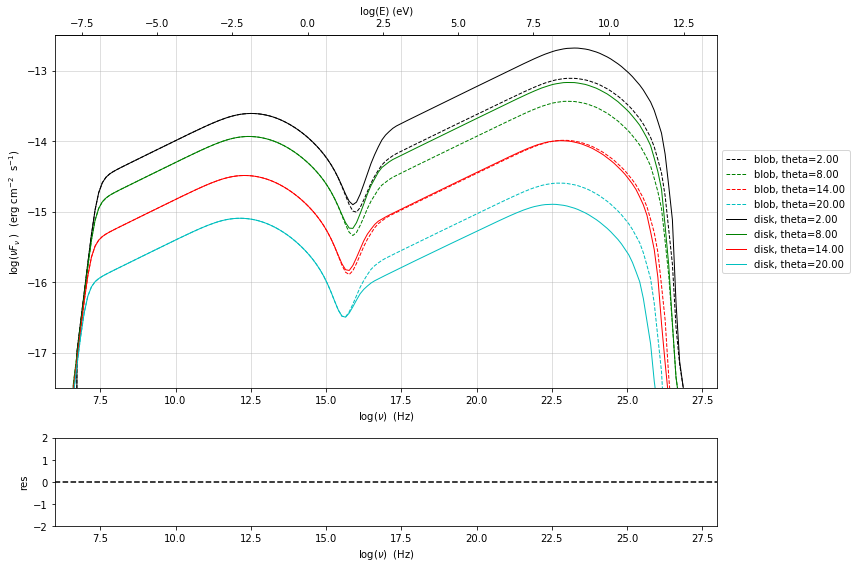

In [17]:
from jetset.plot_sedfit import PlotSED
p=PlotSED()

my_jet.set_external_field_transf('blob')
c= ['k', 'g', 'r', 'c'] 
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='blob, theta=%2.2f'%theta,line_style='--',color=c[ID])

my_jet.set_external_field_transf('disk')
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='disk, theta=%2.2f'%theta,line_style='',color=c[ID])

p.rescale(y_min=-17.5,y_max=-12.5,x_max=28)

## Equipartition

It is also possible to set our jet at the equipartition, that is achieved not using analytical approximation, but by numerically finding the equipartition value over a grid.
We have to provide the value of the observed flux (`nuFnu_obs`) at a given observed frequency (`nu_obs`), the minimum value of B (`B_min`), and the number of grid points (`N_pts`)


B grid min  1e-09
B grid max  1.0
grid points 50


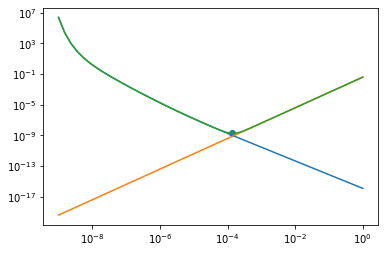

setting B to  0.0001389495494373139
setting N to  9.13927847193837e-06
      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.000000e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 3.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 9.139278e-06     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.580000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.200000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 3.500000e+04     1.000000e+00     1.000000e+09 False  False
               R         

In [18]:
my_jet.parameters.theta.val=12
B_min,b_grid,U_B,U_e=my_jet.set_B_eq(nuFnu_obs=5E-15,nu_obs=1E12,B_min=1E-9,N_pts=50,plot=True)
my_jet.show_pars()

my_jet.eval()


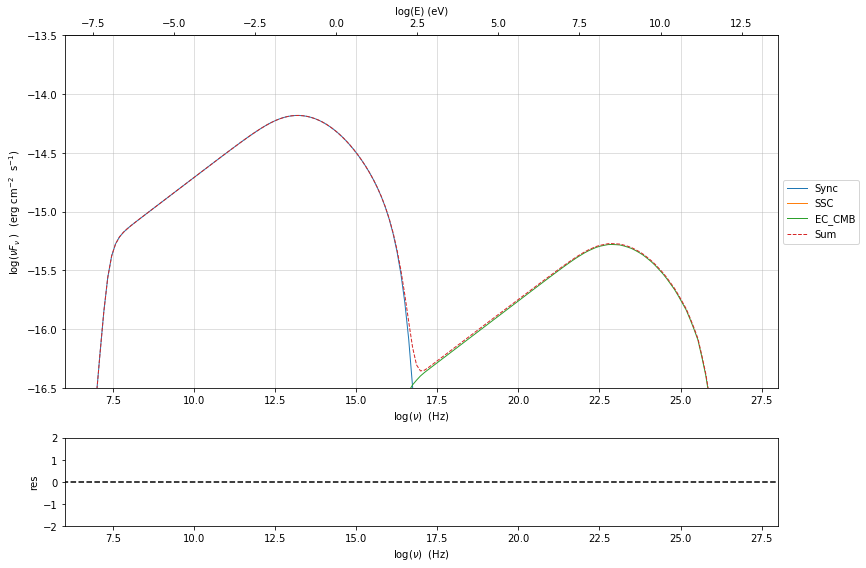

In [19]:
p=my_jet.plot_model()
p.rescale(y_min=-16.5,y_max=-13.5,x_max=28)